<a href="https://colab.research.google.com/github/Midun32/FDSFE_AAdesola/blob/main/CodesInClass/Copy_of_FDSfE_cnn_28nov23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from keras import layers
from keras import datasets
from sklearn.metrics import confusion_matrix

# Load MNIST Data

In [27]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Explore MNIST Data

In [28]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [29]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [30]:
x_train.min(), x_train.max()

(0, 255)

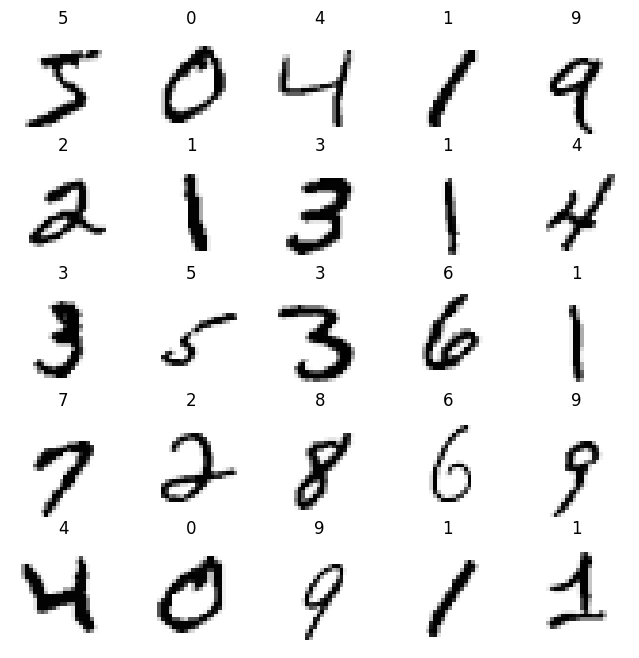

In [31]:
def plot_images(images, labels, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))

    for i in range(nrows * ncols):
        ax = axes.flatten()[i]
        image = images[i]
        label = labels[i]

        ax.set_title(label)
        ax.imshow(image, vmin=0, vmax=255, cmap="Greys")
        ax.set_aspect("equal")
        ax.axis("off")

    fig.show()

plot_images(x_train, y_train, nrows=5, ncols=5)

# Normalize Images

In [32]:
x_train.min(), x_train.max(), x_test.min(), x_test.max()

(0, 255, 0, 255)

In [34]:
def normalize_255(array):
    normed_array = array.astype(float) / 255
    return normed_array

xn_train = normalize_255(x_train)
xn_test = normalize_255(x_test)

xn_train.min(), xn_train.max(), xn_test.min(), xn_test.max()

(0.0, 1.0, 0.0, 1.0)

# Reshape arrays to from (N, 28, 28) to (N, 28, 28, 1)

If these were color images, the arrays would already have shape (N, 28, 28, 3). The extra dimension represents 3 "color channels". In our case, the images are black and white but Keras still needs that extra dimension.

In [35]:
xn_train.shape, xn_test.shape

((60000, 28, 28), (10000, 28, 28))

In [36]:
def reshape_for_keras(array):
    reshaped_array = array[..., None]
    return reshaped_array

xnr_train = reshape_for_keras(xn_train)
xnr_test = reshape_for_keras(xn_test)

xnr_train.shape, xnr_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
xn_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
xn_train[0].shape

(28, 28)

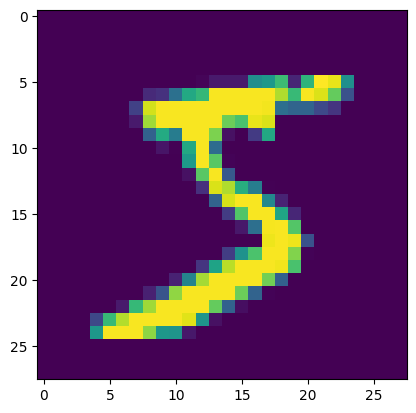

In [39]:
plt.imshow(xn_train[0, :, :])

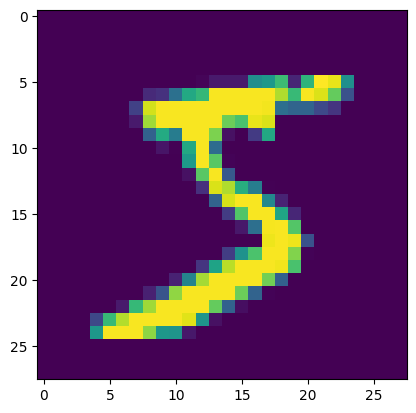

In [40]:
plt.imshow(xnr_train[0, :, :, 0])

# One-hot encode the label arrays

In [41]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [42]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [45]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [46]:
num_classes = np.unique(y_train).size
yoh_train = keras.utils.to_categorical(y_train, num_classes)
yoh_test = keras.utils.to_categorical(y_test, num_classes)

yoh_train.shape, yoh_test.shape

((60000, 10), (10000, 10))

In [47]:
def multiply_stuff():
  a = np.arange(100_000_000)
  return 5 * a

In [48]:
def multiply_stuff():
  a = np.arange(100_000_000)
  for i, element in enumerate(a):
    a[i] = a[i] * 5
  return a

# Build the CNN

In [50]:
def build_cnn(input_shape, num_classes):
  inputs = layers.Input(shape=input_shape)

  x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Flatten()(x)

  x = layers.Dense(512, activation="relu")(x)
  x = layers.Dense(256, activation="relu")(x)
  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dense(64, activation="relu")(x)

  outputs = layers.Dense(num_classes, activation="softmax")(x)

  model = keras.Model(inputs, outputs)
  return model

input_shape = xnr_train.shape[1:]
model = build_cnn(input_shape, num_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0     

# Train model

In [51]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [53]:
model.fit(
    xnr_train,
    yoh_train,
    batch_size=256,
    epochs=10,
    validation_split=0.1,
)

Epoch 1/10
211/211 [==============================] - 13s 10ms/step - loss: 0.3252 - accuracy: 0.9014 - val_loss: 0.0737 - val_accuracy: 0.9803
Epoch 2/10
211/211 [==============================] - 2s 8ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 0.0508 - val_accuracy: 0.9857
Epoch 3/10
211/211 [==============================] - 2s 7ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 4/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0334 - val_accuracy: 0.9903
Epoch 5/10
211/211 [==============================] - 2s 9ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 6/10
211/211 [==============================] - 2s 8ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0421 - val_accuracy: 0.9882
Epoch 7/10
211/211 [==============================] - 2s 8ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0370 - val_accuracy: 0.9917
Epoc

In [54]:
model.evaluate(xnr_test, yoh_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0.9880


[0.041168395429849625, 0.9879999756813049]

# Plot loss and accuracy curves

# Evaluate the model on the testing set

# Make a confusion matrix for the testing set predictions

In [ ]:
def plot_cm(cm, classes):

    # Normalize cm and make off-diagonal elements negative so they appear red in the plot.
    cm = cm.astype("float") / np.nansum(cm, axis=1)[:, np.newaxis]
    off_diag = ~np.eye(cm.shape[0], dtype=bool)
    cm[off_diag] *= -1
    vmin, vmax = -1, 1
    cmap = "RdBu"

    # Plot the cm
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation="None", cmap=cmap, vmin=vmin, vmax=vmax)

    # Create the colorbar and adjust the tick size
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)

    # Set the tick mark labels on the horizontal and vertical axes to be the class names.
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    # This code loops through each element of the confusion matrix and prints the value on the plot.
    fmt = ".2f"
    thresh = cm.max() / 2.0
    import itertools
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text = format(abs(cm[i, j]), fmt)
        if cm[i, j] == 0:
            text = "0"
        plt.text(
            j,
            i,
            text,
            horizontalalignment="center",
            color="white" if abs(cm[i, j]) > thresh else "black",
            fontsize=12,
        )

    plt.tight_layout()
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.tight_layout()

    plt.show()

In [ ]:


labels = np.arange(10)
plot_cm(cm, labels)